In [197]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
%matplotlib inline
data = pd.read_csv('tdata.csv')
prices = data['price']
features = data.drop('price', axis = 1)
print ("Dataset has {} data points with {} variables each.".format(*data.shape))

Dataset has 321 data points with 11 variables each.


In [198]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)
print ("Statistics for housing dataset:\n")
print ("Minimum price: INR{:,.2f}".format(minimum_price))
print ("Maximum price: INR{:,.2f}".format(maximum_price))
print ("Mean price: INR{:,.2f}".format(mean_price))
print ("Median price INR{:,.2f}".format(median_price))
print ("Standard deviation of prices: INR{:,.2f}".format(std_price))

Statistics for housing dataset:

Minimum price: INR26,000.00
Maximum price: INR300,000.00
Mean price: INR96,100.66
Median price INR85,900.00
Standard deviation of prices: INR43,156.35


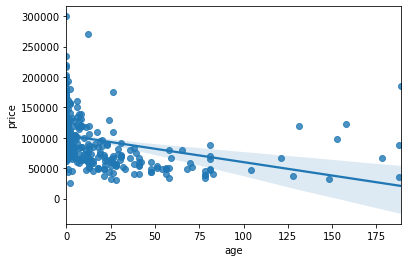

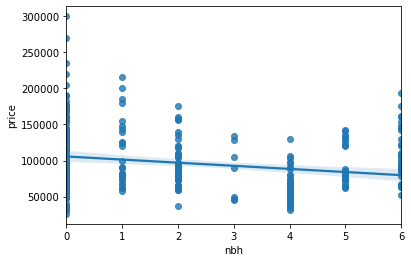

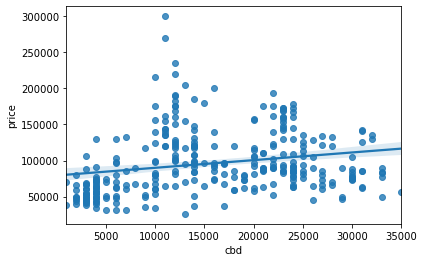

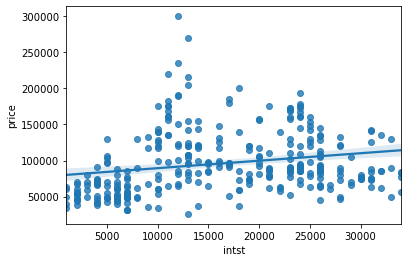

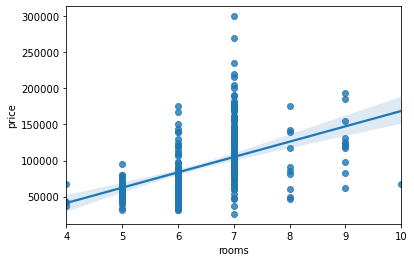

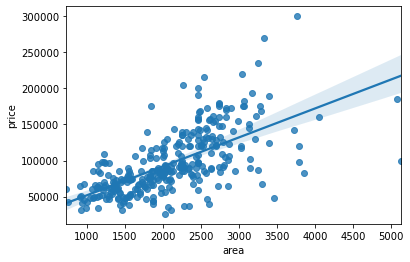

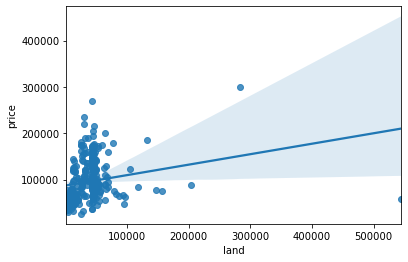

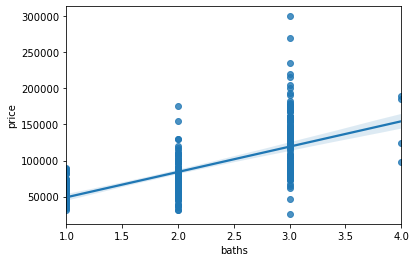

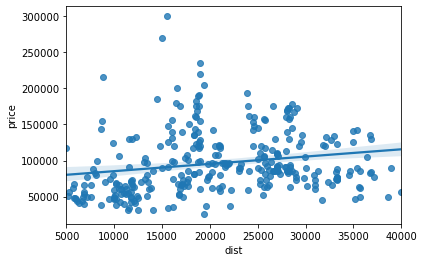

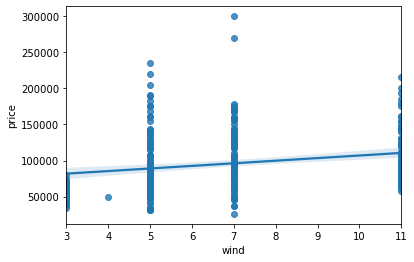

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in features.columns:
    sns.regplot(data[var],prices)
    plt.show()

In [200]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    score = r2_score(y_true,y_predict)
    return score

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=100)
print ("Training and testing split was successful.")

Training and testing split was successful.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

C:\Users\tanma\test\visuals.py:68: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


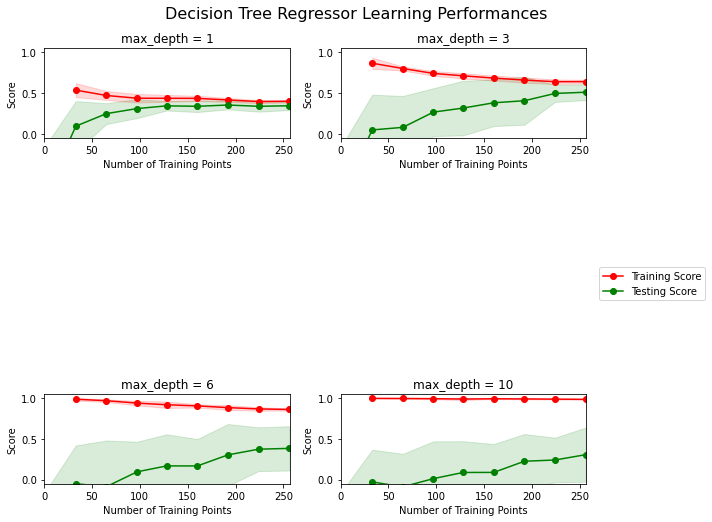

In [202]:
import visuals as vs
vs.ModelLearning(features, prices)

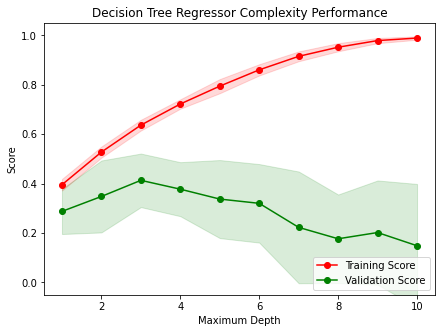

In [203]:
vs.ModelComplexity(X_train, y_train)

In [204]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def fit_model(X, y):
    cv_sets = ShuffleSplit(X.shape[0], n_splits = 10, test_size = 0.20, random_state = 0)
    regressor = DecisionTreeRegressor()
    params = {'max_depth': range(1,11)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cv_sets)
    grid = grid.fit(X, y)
    return grid.best_estimator_


In [205]:
reg = fit_model(X_train, y_train)
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass scoring=make_scorer(performance_metric) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Parameter 'max_depth' is 3 for the optimal model.


In [212]:
client_data = [[42,4,3000,2000,8,1642,7000,2,10500,3
],[8,0,14000,16000,9,2598,44000,3,16000,11
]]

for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: INR{:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: INR53,610.00
Predicted selling price for Client 2's home: INR123,132.36
